# Installazioni ed import necessari

In [ ]:
!mkdir images/
!mkdir save_mat/

In [ ]:
!pip install lxml yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 4.0 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=9f1d6c4dc75da91244875986070c1bbf723506fc0872f345d8b81b55d748b548
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta

In [ ]:
def get_categorical_tickers():
    '''
    This Function returns a dictionary of tickers for different industry types
    :return:
    ticker_dict: Dictionary of 9 different industry types with over 8 tickers each
    tickerSymbols: Set of three tickers
    '''
    ticker_dict = {}
    all_tickers = []
    ticker_dict['energy'] = ['XOM', 'CVX', 'SHEL', 'PTR', 'TTE', 'BP', 'PBR', 'SNP', 'SLB', 'VLO']
    ticker_dict['materials'] = ['BHP', 'LIN', 'RIO', 'DD', 'SHW', 'CTA-PB', 'APD']
    ticker_dict['industrials'] = ['UPS', 'HON', 'LMT', 'BA', 'GE', 'MMM', 'RTX', 'CAT', 'WM', 'ABB', 'ETN', 'EMR',
                                  'FDX', 'TRI']
    ticker_dict['utilities'] = ['NEE', 'DUK', 'NGG', 'AEP', 'XEL','AWK' ,'ETR', 'PCG']
    ticker_dict['healthcare'] = ['UNH', 'JNJ', 'PFE', 'NVO', 'TMO', 'MRK', 'AZN', 'NVS', 'DHR', 'AMGN', 'CVS', 'GSK',
                                 'ZTS', 'GILD']
    ticker_dict['financials'] = ['BRK-A', 'V', 'JPM', 'BAC', 'MA', 'WFC', 'C-PJ', 'MS', 'RY', 'AXP']
    ticker_dict['discretionary'] = ['AMZN', 'TSLA', 'HD', 'BABA', 'TM', 'NKE', 'MCD', 'SBUX', 'F', 'MAR', 'GM', 'ORLY',
                                     'HMC', 'CMG', 'HLT'] # tolgo 'LILI'
    ticker_dict['staples'] = ['WMT', 'PG', 'KO', 'COST', 'PEP', 'BUD', 'UL', 'TGT', 'MDLZ', 'CL', 'DG', 'KHC', 'KDP',
                              'HSY']
    ticker_dict['IT'] = ['AAPL', 'MSFT', 'TSM', 'NVDA', 'AVGO', 'CSCO', 'ORCL', 'ACN', 'ADBE', 'INTC', 'CRM', 'TXN',
                         'QCOM', 'AMD', 'IBM', 'SONY', 'AMAT', 'INFY', 'ADI', 'MU', 'LRCX']
    ticker_dict['communication'] = ['GOOG', 'DIS', 'VZ', 'CMCSA', 'TMUS', 'T', 'NFLX', 'SNAP', 'VOD',
                                    'TWTR', 'EA'] # rimuovo FB, BAIDU
    ticker_dict['estate'] = ['PLD', 'AMT', 'CCI', 'EQIX', 'SPG', 'DLR', 'WELL', 'EQR', 'AVB', 'WY', 'INVH', 'MAA']
    ticker_keys = []
    for key in ticker_dict.keys():
        ticker_keys.append(key)
        all_tickers.append(ticker_dict[key])
    ticker_dict['all'] = all_tickers
    tickerSymbols = ['BRK-A', 'GOOG', 'MSFT']
    return ticker_dict, tickerSymbols

def get_company_names():
    '''
    Get a dictionary of search strings corresponding to different ticker labels
    :return:
    ticker_dict: Dictionary of search strings given a stock ticker
    '''
    ticker_dict = {}
    all_tickers = []
    ticker_dict['energy'] = {'XOM': 'Exxon Mobil', 'CVX': 'Chevron', 'SHEL': 'Shell', 'PTR': 'PetroChina',
                             'TTE': 'TotalEnergies', 'BP': 'BP', 'PBR': 'Petroleo Brasileiro',
                             'SNP': 'China Petroleum', 'SLB': 'Schlumberger', 'VLO': 'Valero'}
    '''
    ticker_dict['materials'] = ['BHP', 'LIN', 'RIO', 'DD', 'SHW', 'CTA-PB', 'APD']
    ticker_dict['industrials'] = ['UPS', 'HON', 'LMT', 'BA', 'GE', 'MMM', 'RTX', 'CAT', 'WM', 'ABB', 'ETN', 'EMR',
                                  'FDX', 'TRI']
    ticker_dict['utilities'] = ['NEE', 'DUK', 'NGG', 'AEP', 'XEL','AWK' ,'ETR', 'PCG']
    ticker_dict['healthcare'] = ['UNH', 'JNJ', 'PFE', 'NVO', 'TMO', 'MRK', 'AZN', 'NVS', 'DHR', 'AMGN', 'CVS', 'GSK',
                                 'ZTS', 'GILD']
    ticker_dict['financials'] = ['BRK-A', 'V', 'JPM', 'BAC', 'MA', 'WFC', 'C-PJ', 'MS', 'RY', 'AXP']
    ticker_dict['discretionary'] = ['AMZN', 'TSLA', 'HD', 'BABA', 'TM', 'NKE', 'MCD', 'SBUX', 'F', 'MAR', 'GM', 'ORLY',
                                    'LILI', 'HMC', 'CMG', 'HLT']
    ticker_dict['staples'] = ['WMT', 'PG', 'KO', 'COST', 'PEP', 'BUD', 'UL', 'TGT', 'MDLZ', 'CL', 'DG', 'KHC', 'KDP',
                              'HSY']
    ticker_dict['IT'] = ['AAPL', 'MSFT', 'TSM', 'NVDA', 'AVGO', 'CSCO', 'ORCL', 'ACN', 'ADBE', 'INTC', 'CRM', 'TXN',
                         'QCOM', 'AMD', 'IBM', 'SONY', 'AMAT', 'INFY', 'ADI', 'MU', 'LRCX']
    ticker_dict['communication'] = ['GOOG', 'FB', 'DIS', 'VZ', 'CMCSA', 'TMUS', 'T', 'NFLX', 'SNAP', 'VOD', 'BAIDU',
                                    'TWTR', 'EA']
    ticker_dict['estate'] = ['PLD', 'AMT', 'CCI', 'EQIX', 'SPG', 'DLR', 'WELL', 'EQR', 'AVB', 'WY', 'INVH', 'MAA']
    ticker_keys = []
    for key in ticker_dict.keys():
        ticker_keys.append(key)
        all_tickers.append(ticker_dict[key])
    ticker_dict['all'] = all_tickers
    '''
    return ticker_dict

def cross_corr(a,b):
    '''
    Compute the cross-correlation between
    :param a: Time-series data of first stock
    :param b: Time-series data of second stock
    :return: Cross-correlation of the two stocks that are input
    '''
    return (a*b).sum()/((a**2).sum()*(b**2).sum())**0.5

def get_tick_values(tickerSymbol, start, end):
    '''
    Function to extract the time series data
    :param tickerSymbol: String of stock ticker
    :param start: String of starting date of the time-series data
    :param end: String of ending date of the time-series data
    :return: type(list): Time series data
    '''
    tickerData = yf.Ticker(tickerSymbol)
    tickerDf = yf.download(tickerSymbol, start=start, end=end)
    tickerDf = tickerDf['Adj Close']
    data = tickerDf
    return data.values

def get_control_vector(val):
    '''
    Returns the mask of day instances where stock purchase/sell decisions are to be made
    :param val: Input array of stock values
    :return: np.array of decisions maks labels (-2/0/2)
    '''
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    '''
    Returns the growth of investment over time as function of the input decision mask and the stock values
    :param val: np.array of the actual stock value over time
    :param controls: np.array of the control mask to make purchase/sell decisions
    :return: np.array of percentage growth value of the invested stock
    '''
    inv = []
    curr_val = 100
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv



In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

# LSTM

In [ ]:
class LSTM_ED_Model():
    '''
    Class to train and infer stock price for one particular stock using the encoder decoder model
    '''
    def __init__(self,tickerSymbol, start, end,
                 past_history = 60, forward_look = 1, train_test_split = 0.8, batch_size = 30,
                 epochs = 50, steps_per_epoch = 200, validation_steps = 50, verbose = 0,
                 depth = 1, naive = False, values = 200, tickerSymbolList = None, LSTM_latent_dim = 20):
        '''
        Initialize parameters for the class
        :param tickerSymbol: String of Ticker symbol to train on
        :param start: String of start date of time-series data
        :param end: String of end date of time-series data
        :param past_history: Int of past number of days to look at
        :param forward_look: Int of future days to predict at a time
        :param train_test_split: Float of fraction train-test split
        :param batch_size: Int of mini-batch size
        :param epochs: Int of total number of epochs in training
        :param steps_per_epoch: Int for total number of mini-batches to run over per epoch
        :param validation_steps: Int of total number of steps to use while validating with the dev set
        :param verbose: Int to decide to print training stage results
        :param infer_train: Flag to carry out prediction on training set
        :param depth: Int to decide depth of stacked LSTM
        :param naive: Flag for deciding if we need a Vanila model
        :param values: Int for number of days to predict for by iteratively updating the time-series histroy
        :param plot_values: Flag to plot
        :param plot_bot: Flag to plot the investment growth by the decision making bot
        :param tickerSymbolList: List of tickers to train the model on
        '''
        self.tickerSymbol = tickerSymbol
        self.start = start
        self.end = end
        self.past_history = past_history
        self.forward_look = forward_look
        self.train_test_split = train_test_split
        self.batch_size = batch_size
        self.epochs = epochs
        self.steps_per_epoch = steps_per_epoch
        self.validation_steps = validation_steps
        self.verbose = verbose
        self.values = values
        self.depth = depth
        self.naive = naive
        self.custom_loss = False
        self.LSTM_latent_dim = LSTM_latent_dim;
        if tickerSymbolList == None:
            self.tickerSymbolList = [tickerSymbol]
        else:
            self.tickerSymbolList = tickerSymbolList
        tf.random.set_seed(1728)

    def data_preprocess(self, dataset, iStart, iEnd, sHistory, forward_look=1):
        '''
        Preprocess the data to make either the test set or the train set
        :param dataset: np.array of time-series data
        :param iStart: int of index start
        :param iEnd: int of index end
        :param sHistory: int number of days in history that we need to look at
        :param forward_look: int of number of days in the future that needs to predicted
        :return: returns a list of test/train data
        '''
        self.data_enc = []
        self.data_dec = []
        self.target = []
        iStart += sHistory
        if iEnd is None:
            iEnd = len(dataset) - forward_look
        for i in range(iStart, iEnd):
            indices_x = range(i - sHistory, i)  # set the order
            indices_x_dec = range(i-1, i + forward_look-1)
            indices_y_dec = range(i, i + forward_look)
            reshape_entity_x = np.asarray([])
            reshape_entity_x = np.append(reshape_entity_x, dataset[indices_x])  # Comment this out if there are multiple identifiers in the feature vector
            reshape_entity_x_dec = np.asarray([])
            reshape_entity_x_dec = np.append(reshape_entity_x_dec, dataset[indices_x_dec])  # Comment this out if there are multiple identifiers in the feature vector
            reshape_entity_y_dec = np.asarray([])
            reshape_entity_y_dec = np.append(reshape_entity_y_dec, dataset[indices_y_dec])  # Comment this out if there are multiple identifiers in the feature vector
            self.data_enc.append(np.reshape(reshape_entity_x, (sHistory, 1)))  #
            self.data_dec.append(np.reshape(reshape_entity_x_dec, (forward_look, 1)))
            self.target.append(np.reshape(reshape_entity_y_dec, (forward_look, 1)))
        self.data_enc = np.array(self.data_enc)
        self.data_dec = np.array(self.data_dec)
        self.target = np.array(self.target)

    def plot_history_values(self):
        '''
        Plots time-series data of the chosen ticker
        '''
        tickerData = yf.Ticker(self.tickerSymbol)
        tickerDf = yf.download(self.tickerSymbol, start=self.start, end=self.end)
        tickerDf = tickerDf['Adj Close']
        data = tickerDf
        y = data
        y.index = data.index
        y.plot()
        plt.title(f"{self.tickerSymbol}")
        plt.ylabel("price")
        plt.show()

    def get_ticker_values(self, option = 0):
        '''
        Get ticker values in a list
        '''
        if option == 0:
            tickerData = yf.Ticker(self.tickerSymbol)
            tickerDf = yf.download(self.tickerSymbol, start=self.start, end=self.end)
            tickerDf = tickerDf['Close']
            data = tickerDf
            self.y = data.values
        else:
            # Write code for multiple tickers. Code below is not enough
            tickerData = yf.Ticker(self.tickerSymbol)
            tickerDf = yf.download(self.tickerSymbol, start=self.start, end=self.end)
            tickerDf = tickerDf['Close']
            data = tickerDf
            self.y = data.values


    def prepare_test_train(self):
        '''
        Create the dataset from the extracted time-series data
        '''
        training_size = int(self.y.size * self.train_test_split)
        training_mean = self.y[:training_size].mean()  # get the average
        training_std = self.y[:training_size].std()  # std = a measure of how far away individual measurements tend to be from the mean value of a data set.
        self.y = (self.y - training_mean) / training_std  # prep data, use mean and standard deviation to maintain distribution and ratios
        self.data_preprocess(self.y, 0, training_size, self.past_history, forward_look = self.forward_look)
        self.xtrain, self.xtrain_dec, self.ytrain = self.data_enc, self.data_dec, self.target
        self.data_preprocess(self.y, training_size, None, self.past_history, forward_look = self.forward_look)
        self.xtest, self.xtest_dec, self.ytest = self.data_enc, self.data_dec, self.target

        self.training_mean_normalization = training_mean
        self.training_std_normalization = training_std

    def normalization_variables(self):
      return self.training_mean_normalization, self.training_std_normalization


    def create_p_test_train(self):
        '''
        Prepare shuffled train and test data
        '''
        BATCH_SIZE = self.batch_size
        BUFFER_SIZE = self.y.size
        p_train = tf.data.Dataset.from_tensor_slices(((self.xtrain, self.xtrain_dec), self.ytrain))
        self.p_train = p_train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).repeat()
        p_test = tf.data.Dataset.from_tensor_slices(((self.xtest, self.xtest_dec), self.ytest))
        self.p_test = p_test.batch(BATCH_SIZE).repeat()

    def model_LSTM(self):
        '''
        Create the stacked LSTM model and train it using the shuffled train set
        '''
        latent_dim = self.LSTM_latent_dim
        encoder_inputs = keras.Input(shape=(None, 1))
        encoder = keras.layers.LSTM(latent_dim, return_state=True)  # Number of latent dimensions, defaults to 20
        encoder_outputs, state_h, state_c = encoder(encoder_inputs)

        # We discard `encoder_outputs` and only keep the states.
        encoder_states = [state_h, state_c]

        # Set up the decoder, using `encoder_states` as initial state.
        decoder_inputs = keras.Input(shape=(None, 1))
        # We set up our decoder to return full output sequences,
        # and to return internal states as well. We don't use the
        # return states in the training model, but we will use them in inference.
        decoder_lstm = keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
        decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
        decoder_dense = keras.layers.Dense(1, activation=None)
        decoder_outputs = decoder_dense(decoder_outputs)

        # Define the model that will turn
        # `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
        self.model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

        self.model.compile(optimizer='Adam',
                           loss='mse', metrics=['mse'])
        self.create_p_test_train()
        self.history  = self.model.fit(self.p_train,
                                 epochs=self.epochs,
                                 batch_size=self.batch_size,
                                 steps_per_epoch=self.steps_per_epoch,
                                 validation_data=self.p_test,
                                 validation_steps=self.validation_steps,
                                 verbose=self.verbose)

    def model_inference_LSTM(self):
        latent_dim = self.LSTM_latent_dim

        encoder_inputs = self.model.input[0]  # input_1
        encoder_outputs, state_h_enc, state_c_enc = self.model.layers[2].output  # lstm_1
        encoder_states = [state_h_enc, state_c_enc]
        self.encoder_model = keras.Model(encoder_inputs, encoder_states)

        decoder_inputs = self.model.input[1]  # input_2
        decoder_state_input_h = keras.Input(shape=(latent_dim,))
        decoder_state_input_c = keras.Input(shape=(latent_dim,))
        decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
        decoder_lstm = self.model.layers[3]
        decoder_outputs, state_h_dec, state_c_dec = decoder_lstm(
            decoder_inputs, initial_state=decoder_states_inputs
        )
        decoder_states = [state_h_dec, state_c_dec]
        decoder_dense = self.model.layers[4]
        decoder_outputs = decoder_dense(decoder_outputs)
        self.decoder_model = keras.Model(
            [decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states
        )

    def infer_values(self, xtest, ytest, ts):
        '''
        Infer values by using the test set
        :param xtest: test dataset
        :param ytest: actual value dataset
        :param ts: tikcer symbol
        :return: model variables that store predicted data
        '''
        self.pred = []
        self.pred_update = []
        self.usetest = xtest.copy()

        # Predict encoder for x_test to get decoder inputs. Iteratively predict decoder output.
        # This one is incomplete.
        states_value = self.encoder_model.predict(xtest[0:1,:,:])
        decoder_input = xtest[0:1, -1, :]  # choosing the most recent value to feed the decoder
        for i in range(self.values):
            new_pred, h, c = self.decoder_model.predict([decoder_input] + states_value)
            y_pred = new_pred.reshape((-1, 1))
            decoder_input = new_pred
            states_value = [h, c]
            self.pred_update.append(y_pred)
        self.pred_update = np.array(self.pred_update)

        # Predict encoder for x_test to get decoder inputs and use it for the decoder for one extra day.
        states_value = self.encoder_model.predict(xtest)
        decoder_input = xtest[:, -1, :]  # choosing the most recent value to feed the decoder
        new_pred, h, c = self.decoder_model.predict([decoder_input] + states_value)
        y_pred = new_pred[:self.values,0:1,0:1]
        self.pred = y_pred


        if self.forward_look>1:
            self.RMS_error = self.history.history['mse'][-1]
        else:
            self.RMS_error = self.history.history['mse'][-1]

    def infer_all_values(self, xtest, ytest, ts):
        '''
        Infer values by using the test set
        :param xtest: test dataset
        :param ytest: actual value dataset
        :param ts: tikcer symbol
        :return: model variables that store predicted data
        '''
        self.pred = []
        self.pred_update = []
        self.usetest = xtest.copy()

        # Predict encoder for x_test to get decoder inputs. Iteratively predict decoder output.
        # This one is incomplete.
        states_value = self.encoder_model.predict(xtest[0:1,:,:])
        decoder_input = xtest[0:1, -1, :]  # choosing the most recent value to feed the decoder
        print(f'Infering {len(xtest)} values')
        for i in range(len(xtest)):
            new_pred, h, c = self.decoder_model.predict([decoder_input] + states_value)
            y_pred = new_pred.reshape((-1, 1))
            decoder_input = new_pred
            states_value = [h, c]
            self.pred_update.append(y_pred)
        self.pred_update = np.array(self.pred_update)

        # Predict encoder for x_test to get decoder inputs and use it for the decoder for one extra day.
        states_value = self.encoder_model.predict(xtest)
        decoder_input = xtest[:, -1, :]  # choosing the most recent value to feed the decoder
        new_pred, h, c = self.decoder_model.predict([decoder_input] + states_value)
        y_pred = new_pred[:len(xtest),0:1,0:1]
        self.pred = y_pred


        if self.forward_look>1:
            self.RMS_error = self.history.history['mse'][-1]
        else:
            self.RMS_error = self.history.history['mse'][-1]

    def get_predicted_values(self):
      return self.xt, self.yt, self.pred, self.pred_update


    def plot_test_values(self):
        '''
        Plot predicted values against actual values
        '''
        plt.figure()
        if self.forward_look > 1:
            print("Sorry, still working on this\n")
            # plt.plot(self.ytest[:self.values, 0, 0],'*-', label='actual (%s)' % self.ts)
            # plt.plot(self.pred[:,0,0],'o-', label='predicted (%s)' % self.ts)
            # # plt.plot(self.pred_update[1:, 0], label='predicted (update)')
            # plt.xlabel("Days")
            # plt.ylabel("Normalized stock price")
            # plt.title('The relative RMS error is %f' % self.RMS_error)
            # plt.legend()
            # plt.savefig('../images/ED_Stock_prediction_%d_%d_%d_%d_%s.png' % (
            #     self.depth, int(self.naive), self.past_history, self.forward_look, self.ts))
            # plt.figure()
            # plt.plot(self.pred[1:, 0]-self.pred_update[1:,0], label='difference (%s)' % self.ts)
        else:
            plt.plot(self.ytest[:self.values, 0, 0], '-', label='actual (%s)' % self.ts)
            plt.plot(self.pred[:, 0, 0], '-', label='predicted (%s)' % self.ts)
            #plt.plot(self.pred_update[:, 0, 0], label='predicted (update)')
            plt.xlabel("Days")
            plt.ylabel("Normalized stock price")
            plt.title('The relative RMS error is %f' % self.RMS_error)
            plt.legend()
            plt.savefig('images/ED_Stock_prediction_%d_%d_%d_%d_%s.png' % (
                self.depth, int(self.naive), self.past_history, self.forward_look, self.ts))
            plt.clf()
            np.savez('save_mat/EDstore_%d_%d_%d_%d_%s_%s.png' % (
                self.depth, int(self.naive), self.past_history, self.forward_look, self.ts, int(self.custom_loss)),
                     y=self.yt[:self.values - 1, 0, 0], pred=self.pred[1:, 0], pred_up=self.pred_update[1:, 0])

        print('The relative RMS error is %f' % self.RMS_error)

    def arch_plot(self):
        '''
        Plot the network architecture
        '''
        dot_img_file = 'images/LSTM_ED_arch_depth%d_naive%d.png' %( self.depth, int(self.naive))
        tf.keras.utils.plot_model(self.model, to_file=dot_img_file, show_shapes=True)
    	        
    def full_workflow(self, model=None):
        self.get_ticker_values()
        self.prepare_test_train()
        self.model_LSTM()
        self.model_inference_LSTM()
        if model is None:
            self.xt = self.xtest
            self.yt = self.ytest
            self.ts = self.tickerSymbol
        else:
            self.xt = model.xtest
            self.yt = model.ytest
            self.ts = model.tickerSymbol
        #self.infer_values(self.xt, self.yt, self.ts)
        self.infer_all_values(self.xt, self.yt, self.ts)
        # self.arch_plot()

    def full_workflow_and_plot(self, model=None):
        '''
        Workflow to carry out the entire process end-to-end
        :param model: Choose which model to use to predict inferred values
        :return:
        '''
        self.full_workflow(model=model)
        self.plot_test_values()

    def get_model(self):
      return self.model, self.encoder_model, self.decoder_model

    def plot_bot_decision(self):
        '''
        calculate investment growth from the inferred prediction value and plot the resulting growth
        '''
        if self.forward_look > 1:
            ideal = self.ytest[:self.values - 1, 0, 0]
            pred = np.asarray(self.pred[0,1:, 0]).reshape(-1, )
        else:
            ideal = self.ytest[:self.values - 1,0,0]
            pred = np.asarray(self.pred[0,1:,0]).reshape(-1, )
        control_ideal = get_control_vector(ideal)
        control_pred = get_control_vector(pred)
        bot_ideal = buy_and_sell_bot(ideal, control_ideal)
        bot_pred = buy_and_sell_bot(ideal, control_pred)
        plt.figure()
        plt.plot(bot_ideal, label='Ideal case (%.2f)' % bot_ideal[-1])
        plt.plot(bot_pred, label='From prediction (%.2f)' % bot_pred[-1])
        plt.plot(ideal / ideal[0] * 100.0, label='Stock value(%s)' % self.ts)
        plt.xlabel("Days")
        plt.ylabel("Percentage growth")
        plt.legend()
        plt.savefig('images/ED_Bot_prediction_%d_%d_%d_%d.png' % (
        self.depth, int(self.naive), self.past_history, self.forward_look))
        np.savez('save_mat/EDbot_%d_%d_%d_%d_%s_%s.png' % (
            self.depth, int(self.naive), self.past_history, self.forward_look, self.ts, int(self.custom_loss)),
                 ideal=bot_ideal, pred=bot_pred, pred_up=bot_pred_update)
        plt.clf()


# Funzione Investimento


In [ ]:
def calculate_investment(dataset ,initial_investment=1_000):
  '''
  Return the final value of investment
  '''
  open_close_prices = dataset[['Open', 'Close']]
  decisions = dataset['operation'] # if 1 -> buy, else sell
  total_cash = initial_investment
  price_decision = 1

  #creo il dizionario di analisi
  stats = {}
  stats['cash invested'] = []
  stats['Buy at'] = []
  stats['Close at'] = []
  stats['n stock buyed'] = []
  stats['Bot decision'] = []
  stats['cash returned'] = []



  # per le operazioni buy
  for i in open_close_prices.index:
    
    open_price = open_close_prices['Open'].loc[i]
    close_price = open_close_prices['Close'].loc[i]
    if(decisions.loc[i] == 1):
      #print(f'\nBuy {n_stock} stock for {open_price}')
      # a fine giornata chiudo la posizione aperta in precedenza
      price_decision = close_price
      price_open_operation = open_price
      #print(f'Close with return at {cash}')
    else:
      # se decision sell
      price_decision = open_price
      price_open_operation = close_price

    n_stock = total_cash / price_open_operation
    cash = n_stock * price_decision

    stats['cash invested'].append(total_cash)
    stats['Buy at'].append(open_price)
    stats['Close at'].append(close_price)
    stats['n stock buyed'].append(n_stock)
    stats['Bot decision'].append(decisions.loc[i])
    stats['cash returned'].append(cash)
    
    total_cash = cash


  return total_cash, stats


# TEST su indici intenazionali

In [ ]:
stock_list_exam = ['^GSPC', '^FTSE', '^GDAXI', '^NSEI']
start = '2010-01-01'
end = '2022-01-01'

In [ ]:
stock = 'AAPL'

In [ ]:
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
split = 0.8967
index = int(len(df)*split)
df.iloc[index]

Open         1.157000e+02
High         1.161200e+02
Low          1.122500e+02
Close        1.131600e+02
Adj Close    1.118103e+02
Volume       1.614982e+08
Name: 2020-10-06 00:00:00, dtype: float64

In [ ]:
LSTM_1 = LSTM_ED_Model(tickerSymbol = stock , start = start, end = end, depth = 0, epochs=50, naive = True, verbose = True, train_test_split=0.8967)
LSTM_1.full_workflow()

In [ ]:
modello, encoder, decoder = LSTM_1.get_model()

In [ ]:
LSTM_1.RMS_error

0.0016842910554260015

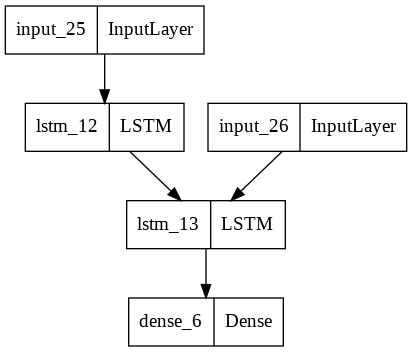

In [ ]:
tf.keras.utils.plot_model(modello)

In [ ]:
xt, yt, pred, pred_update = LSTM_1.get_predicted_values()

In [ ]:
xt.shape

(252, 60, 1)

In [ ]:
pred.reshape(-1,1).shape, yt.reshape(-1,1).shape

((252, 1), (252, 1))

In [ ]:
yt[0], pred[0]

(array([[2.66075555]]), array([[2.625412]], dtype=float32))

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(yt.reshape(-1,1))
plt.plot(pred.reshape(-1,1))

In [ ]:
df.iloc[-252:]['Close'].plot(figsize=(18,10))

In [ ]:
df_test = df.iloc[-252:].copy()

In [ ]:
close_norm = pd.Series(yt.reshape(-1), index=df_test.index)

In [ ]:
pred_r = pd.Series(pred.reshape(-1), index=df_test.index)

In [ ]:
df_test['pred'] = pred_r
df_test['close_norm'] = close_norm

In [ ]:
df_test.head()

,Open,High,Low,Close,Adj Close,Volume,pred,close_norm
Date,,,,,,,,
2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5006680000,2.625412,2.660756
2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4582620000,2.652255,2.574635
2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6049970000,2.596833,2.615364
2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5080870000,2.611685,2.648432
2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4764180000,2.641599,2.734911


In [ ]:
mean_open = df[:-252].Open.mean()
std_open = df[:-252].Open.std()

In [ ]:
open_norm = (df_test.Open - mean_open) / std_open

In [ ]:
mean_close = df[:-252].Close.mean()
std_close = df[:-252].Close.std()

In [ ]:
close_norm = (df_test.Close - mean_close) / std_close

In [ ]:
df_test['open_norm'] = open_norm
df_test['close_norm'] = close_norm

In [ ]:
df_test.head()

,Open,High,Low,Close,Adj Close,Volume,pred,close_norm,open_norm,decision,operation,close_nomr
Date,,,,,,,,,,,,
2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5006680000,2.625412,2.405951,2.500958,1,1,2.574635
2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4582620000,2.652255,2.444797,2.402282,1,1,2.615364
2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6049970000,2.596833,2.476335,2.423295,1,1,2.648432
2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5080870000,2.611685,2.558814,2.501106,1,1,2.734911
2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4764180000,2.641599,2.589774,2.575702,1,1,2.767373


In [ ]:
df_test['operation'] = np.where(df_test['pred'] > df_test['open_norm'], 1, 0 )

In [ ]:
tot, stats = calculate_investment(df_test)

In [ ]:
tot

1180.0420935826521

In [ ]:
pd.DataFrame(stats)

,cash invested,Buy at,Close at,n stock buyed,Bot decision,cash returned
0,1000.000000,133.520004,129.410004,7.489514,1,969.218091
1,969.218091,128.889999,131.009995,7.519731,1,985.159884
2,985.159884,127.720001,126.599998,7.713435,1,976.520816
3,976.520816,128.360001,130.919998,7.607672,1,995.996438
4,995.996438,132.429993,132.050003,7.520928,1,993.138563
...,...,...,...,...,...,...
247,1075.682431,177.089996,180.330002,5.965077,0,1056.355547
248,1056.355547,180.160004,179.289993,5.891882,0,1061.481546
249,1061.481546,179.330002,179.380005,5.917502,0,1061.185652
250,1061.185652,179.470001,178.199997,5.955026,0,1068.748561


In [ ]:
# prelevo i dati
td, _ = get_categorical_tickers()
td.pop('all')
diz = {}
diz['stock'] = []
diz['roi'] = []
diz['gain'] = []

for k in td.keys():

  for stock in td[k][:3]:
    # scarico i dati
    df = yf.download(stock, start, end)

    # creo il modello
    LSTM_1 = LSTM_ED_Model(tickerSymbol = stock , start = start, end = end, depth = 0, epochs=50, naive = True, verbose = True, train_test_split=0.8967)
    LSTM_1.full_workflow()

    xt, yt, pred, pred_update = LSTM_1.get_predicted_values()
    df_test = df[-pred.shape[0]:].copy()

    pred_r = pd.Series(pred.reshape(-1), index=df_test.index)
    df_test['pred'] = pred_r

    mean_open = df[:-pred.shape[0]].Open.mean()
    std_open = df[:-pred.shape[0]].Open.std()

    open_norm = (df_test.Open - mean_open) / std_open
    df_test['open_norm'] = open_norm
    df_test['operation'] = np.where(df_test['pred'] > df_test['open_norm'], 1, 0 )
    tot, stats = calculate_investment(df_test,df_test.Open.iloc[0])

    roi = (tot - df_test.Open.iloc[0])/ df_test.Open.iloc[0]

    diz['stock'].append(stock)
    diz['roi'].append(roi)
    diz['gain'].append(tot)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/50
200/200 [==============================] - 12s 23ms/step - loss: 0.1909 - mse: 0.1909 - val_loss: 0.0633 - val_mse: 0.0633
Epoch 2/50
200/200 [==============================] - 3s 17ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0391 - val_mse: 0.0391
Epoch 3/50
200/200 [==============================] - 4s 18ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 4/50
200/200 [==============================] - 3s 17ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 5/50
200/200 [==============================] - 3s 17ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 6/50
200/200 [==============================] - 3s 17ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 7/50
200/200 [==============================] - 3s 17ms/s

In [ ]:
pd.DataFrame(diz).sort_values(by='roi').tail(20)

,stock,roi,gain
21,WMT,-0.009049,142.994181
3,BHP,-0.007398,60.211340
29,VZ,0.025880,60.485872
4,LIN,0.051107,280.340689
8,LMT,0.052405,373.582643
22,PG,0.066605,148.962079
1,CVX,0.074463,91.490491
25,MSFT,0.102404,245.318061
13,JNJ,0.107032,174.069753
14,PFE,0.113480,41.054023


In [ ]:
modello, encoder, decoder = LSTM_1.get_model()

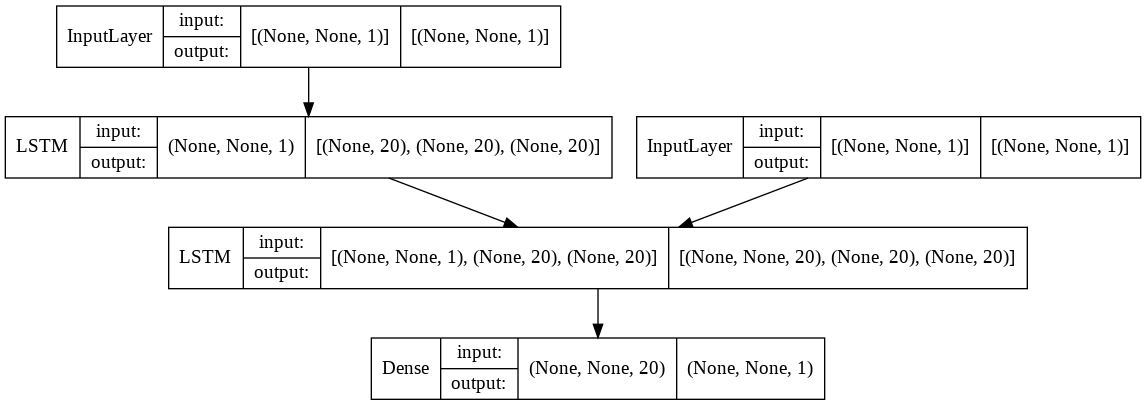

In [ ]:
tf.keras.utils.plot_model(
    modello,
    #to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

In [ ]:
stock_list_exam = ['TSM' ,'DIS', 'JPM' ,'BRK-A', 'DUK' ,'HD', 'UNH' ,'AAPL' ,'CCI', 'AMT']

In [ ]:
stock_list_exam = ['^GSPC', '^FTSE', '^GDAXI','^NSEI'] # '^NSEI',

In [ ]:
start = '2010-01-01'
end = '2022-01-01'

In [ ]:
# prelevo i dati
td, _ = get_categorical_tickers()
td.pop('all')
diz = {}
diz['stock'] = []
diz['roi'] = []
diz['gain'] = []
diz['RMS'] = []



for stock in stock_list_exam:
  # scarico i dati
  df = yf.download(stock, start, end)

  # creo il modello
  LSTM_1 = LSTM_ED_Model(tickerSymbol = stock , start = start, end = end, values=252, depth = 0, epochs=50, naive = True, verbose = True, train_test_split=0.8967)
  LSTM_1.full_workflow_and_plot()

  error = LSTM_1.RMS_error
  


  xt, yt, pred, pred_update = LSTM_1.get_predicted_values()
  df_test = df[-pred.shape[0]:].copy()

  pred_r = pd.Series(pred.reshape(-1), index=df_test.index)
  df_test['pred'] = pred_r

  mean_open = df[:-pred.shape[0]].Open.mean()
  std_open = df[:-pred.shape[0]].Open.std()

  open_norm = (df_test.Open - mean_open) / std_open
  df_test['open_norm'] = open_norm
  df_test['operation'] = np.where(df_test['pred'] > df_test['open_norm'], 1, 0 )
  tot, stats = calculate_investment(df_test,df_test.Open.iloc[0])

  roi = (tot - df_test.Open.iloc[0])/ df_test.Open.iloc[0]

  diz['stock'].append(stock)
  diz['roi'].append(roi)
  diz['gain'].append(tot)
  diz['RMS'].append(error)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Epoch 1/50
200/200 [==============================] - 7s 21ms/step - loss: 0.1617 - mse: 0.1617 - val_loss: 1.7442 - val_mse: 1.7442
Epoch 2/50
200/200 [==============================] - 3s 17ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 1.0163 - val_mse: 1.0163
Epoch 3/50
200/200 [==============================] - 3s 17ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.6505 - val_mse: 0.6505
Epoch 4/50
200/200 [==============================] - 3s 17ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.4712 - val_mse: 0.4712
Epoch 5/50
200/200 [==============================] - 3s 17ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.3404 - val_mse: 0.3404
Epoch 6/50
200/200 [==============================] - 3s 17ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.2780 - val_mse: 0.2780
Epoch 7/50
200/200 [==============================] - 3s 17ms/st

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
pd.DataFrame(diz)

,stock,roi,gain,RMS
0,^GSPC,0.038739,3910.448698,0.001438
1,^FTSE,0.185620,7659.698716,0.008058
2,^GDAXI,0.133582,15508.188678,0.002577
3,^NSEI,0.002008,14287.035446,0.001567


Text(0, 0.5, 'RMS error')

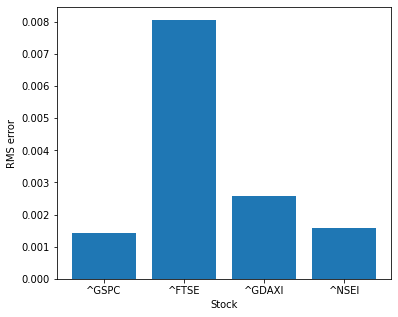

In [ ]:
plt.figure(figsize=(6,5))
plt.bar(diz['stock'],diz['RMS'])
plt.xlabel('Stock')
plt.ylabel('RMS error')